<a href="https://colab.research.google.com/github/lohith1804/Certificate_Generator/blob/main/Copy_of_FinalOnion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install klib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import klib

In [4]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data=pd.read_csv('/content/drive/MyDrive/vishnucsv/vegetable_inflation_2020_2030.csv')
# /content/drive/MyDrive/vishnucsv

Mounted at /content/drive


In [5]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/vishnucsv/vegetable_inflation_2020_2030.csv')
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943374 entries, 0 to 2943373
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   arrival_date  object 
 1   state         object 
 2   district      object 
 3   market        object 
 4   commodity     object 
 5   variety       object 
 6   min_price     float64
 7   max_price     float64
 8   modal_price   float64
dtypes: float64(3), object(6)
memory usage: 202.1+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/vishnucsv/vegetable_inflation_2020_2030.csv')

# Data preprocessing
# Convert arrival_date to numerical (UNIX timestamp)
# data['arrival_date'] = pd.to_datetime(data['arrival_date'], format='%d/%m/%Y').astype(int) / 10**9  # Assuming DD/MM/YYYY format
# Data preprocessing
# Convert arrival_date to numerical (UNIX timestamp)
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d', errors='coerce').astype(int) / 10**9  # Assuming YYYY-MM-DD format
# Define features and target variables
X = data[['arrival_date', 'state', 'district', 'market', 'commodity', 'variety']]
y = data[['min_price', 'max_price', 'modal_price']]

# Check for missing values in the target variables (y)
print(y.isnull().sum())

# ***Handle Missing Values in Target Variable (y)***
# ***Option 1: Drop rows with any missing values in the target variables***
data.dropna(subset=['min_price', 'max_price', 'modal_price'], inplace=True)

# ***Option 2: Impute missing values (e.g., with the mean)***
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# y_imputed = imputer.fit_transform(y)  # y_imputed will contain imputed values
# y = pd.DataFrame(y_imputed, columns=y.columns, index=y.index)  # Update y with imputed values


# Reset X and y after handling missing values
X = data[['arrival_date', 'state', 'district', 'market', 'commodity', 'variety']]
y = data[['min_price', 'max_price', 'modal_price']]


# One-hot encode categorical features
X = pd.get_dummies(X, columns=['state', 'district', 'market', 'commodity', 'variety']) # Explicitly specify columns

# Save feature columns for future inference
joblib.dump(X.columns, 'model_columns.pkl')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the trained model
joblib.dump(model, 'price_predictor_model.pkl')

print("Model training complete. Saved as 'price_predictor_model.pkl'")

min_price      187026
max_price      187026
modal_price    187026
dtype: int64


In [ ]:
data

In [ ]:
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Anantapur,Anantapur,Onion,Hybrid,01/10/2024,1746,4460,3103
1,Andhra Pradesh,Anantapur,Anantapur,Onion,Local,02/10/2024,1290,3900,2595
2,Andhra Pradesh,Anantapur,Anantapur,Onion,Local,03/10/2024,1280,4220,2750
3,Andhra Pradesh,Anantapur,Anantapur,Onion,Red Onion,04/10/2024,1908,3949,2928
4,Andhra Pradesh,Anantapur,Anantapur,Onion,Hybrid,05/10/2024,1804,4319,3061
...,...,...,...,...,...,...,...,...,...
8003,Telangana,Yadadri Bhuvanagiri,Yadadri Bhuvanagiri,Onion,Red Onion,27/03/2025,1436,4291,2863
8004,Telangana,Yadadri Bhuvanagiri,Yadadri Bhuvanagiri,Onion,Red Onion,28/03/2025,1750,4063,2906
8005,Telangana,Yadadri Bhuvanagiri,Yadadri Bhuvanagiri,Onion,Red Onion,29/03/2025,1008,3672,2340
8006,Telangana,Yadadri Bhuvanagiri,Yadadri Bhuvanagiri,Onion,Hybrid,30/03/2025,1883,4598,3240


In [ ]:
# Assuming the format is either 'DD/MM/YYYY' or 'YYYY-MM-DD'
data[['day', 'month', 'year']] = data['arrival_date'].str.extract(r'(\d{1,2})[/-](\d{1,2})[/-](\d{4})').fillna(pd.NA)
# Convert the new columns to their appropriate data types if needed
data['day'] = pd.to_numeric(data['day'], errors='coerce').astype(pd.Int64Dtype())
data['month'] = pd.to_numeric(data['month'], errors='coerce').astype(pd.Int64Dtype())
data['year'] = pd.to_numeric(data['year'], errors='coerce').astype(pd.Int64Dtype())

print("\nNew DataFrame:")
print(data)


New DataFrame:
        arrival_date           state  district           market commodity  \
0         2020-01-01  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
1         2020-01-02  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
2         2020-01-03  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
3         2020-01-04  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
4         2020-01-05  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
...              ...             ...       ...              ...       ...   
2943369   2030-12-27     West Bengal  Siliguri  Siliguri Market    Tomato   
2943370   2030-12-28     West Bengal  Siliguri  Siliguri Market    Tomato   
2943371   2030-12-29     West Bengal  Siliguri  Siliguri Market    Tomato   
2943372   2030-12-30     West Bengal  Siliguri  Siliguri Market    Tomato   
2943373   2030-12-31     West Bengal  Siliguri  Siliguri Market    Tomato   

        variety    min_price    max_price  modal_price   da

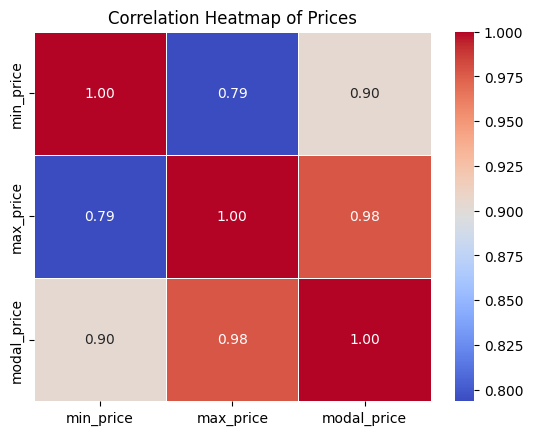

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns
selected_columns = ['min_price', 'max_price', 'modal_price']
numeric_data = data[selected_columns]

# Plot heatmap for selected columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Prices")
plt.show()


In [ ]:
data=klib.data_cleaning(data)

Shape of cleaned data: (2943374, 9) - Remaining NAs: 561078


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 3
     of which 0 single valued.     Columns: []
Dropped missing values: 8830122
Reduced memory by at least: 190.72 MB (-68.63%)



Data cleaning using klib
# klib.describe - functions for visualizing datasets
- klib.cat_plot(data) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(data) # returns a color-encoded correlation matrix
- klib.corr_plot(data) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(data) # returns a distribution plot for every numeric feature
- klib.missingval_plot(data) # returns a figure containing information about missing values

# klib.clean - functions for cleaning datasets
- klib.data_cleaning(data) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(data) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(data) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(data) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(data) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(data) # pools subset of cols based on duplicates with min. loss of information

# klib.preprocess - functions for data preprocessing (feature selection, scaling, ...)
- klib.train_dev_test_split(data) # splits a dataset and a label into train, optionally dev and test sets
- klib.feature_selection_pipe() # provides common operations for feature selection
- klib.num_pipe() # provides common operations for preprocessing of numerical data
- klib.cat_pipe() # provides common operations for preprocessing of categorical data
- klib.preprocess.ColumnSelector() # selects num or cat columns, ideal for a Feature Union or Pipeline
- klib.preprocess.PipeInfo() # prints out the shape of the data at the specified step of a Pipeline

Shape of cleaned data: (2366, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 2 single valued.     Columns: ['state', 'commodity']
Dropped missing values: 0
Reduced memory by at least: 0.17 MB (-77.27%)



In [ ]:
klib.clean_column_names(data)

,arrival_date,state,district,market,commodity,variety,min_price,max_price,modal_price
0,2020-01-01,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
1,2020-01-02,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
2,2020-01-03,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
3,2020-01-04,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
4,2020-01-05,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2943369,2030-12-27,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1130.126221,4504.453789,2817.290005
2943370,2030-12-28,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1000.778534,3988.900156,2494.839345
2943371,2030-12-29,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1038.799313,4140.443267,2589.621290
2943372,2030-12-30,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1016.902637,4053.167559,2535.035098


In [ ]:
# Assuming the format is either 'DD/MM/YYYY' or 'YYYY-MM-DD'
data[['day', 'month', 'year']] = data['arrival_date'].str.extract(r'(\d{1,2})[/-](\d{1,2})[/-](\d{4})').fillna(pd.NA)
# Convert the new columns to their appropriate data types if needed
data['day'] = pd.to_numeric(data['day'], errors='coerce').astype(pd.Int64Dtype())
data['month'] = pd.to_numeric(data['month'], errors='coerce').astype(pd.Int64Dtype())
data['year'] = pd.to_numeric(data['year'], errors='coerce').astype(pd.Int64Dtype())

print("\nNew DataFrame:")
print(data)

# Move drop_duplicates after creating the 'month' column
df = data.drop_duplicates(subset = ["month"])
df


New DataFrame:
        arrival_date           state  district           market commodity  \
0         2020-01-01  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
1         2020-01-02  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
2         2020-01-03  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
3         2020-01-04  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
4         2020-01-05  Andhra Pradesh    Guntur    Guntur Market   Brinjal   
...              ...             ...       ...              ...       ...   
2943369   2030-12-27     West Bengal  Siliguri  Siliguri Market    Tomato   
2943370   2030-12-28     West Bengal  Siliguri  Siliguri Market    Tomato   
2943371   2030-12-29     West Bengal  Siliguri  Siliguri Market    Tomato   
2943372   2030-12-30     West Bengal  Siliguri  Siliguri Market    Tomato   
2943373   2030-12-31     West Bengal  Siliguri  Siliguri Market    Tomato   

        variety    min_price    max_price  modal_price   da

,arrival_date,state,district,market,commodity,variety,min_price,max_price,modal_price,day,month,year
0,2020-01-01,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [ ]:
data=klib.convert_datatypes(data)

In [ ]:
data=klib.drop_missing(data)

In [ ]:
klib.mv_col_handling(data)

/usr/local/lib/python3.11/dist-packages/klib/clean.py:443: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_local[cols_mv] = data_local[cols_mv].applymap(lambda x: x if pd.isna(x) else 1).fillna(0)


,arrival_date,state,district,market,commodity,variety,min_price,max_price,modal_price
0,2020-01-01,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
1,2020-01-02,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
2,2020-01-03,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
3,2020-01-04,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
4,2020-01-05,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2943369,2030-12-27,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1130.126221,4504.453789,2817.290005
2943370,2030-12-28,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1000.778534,3988.900156,2494.839345
2943371,2030-12-29,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1038.799313,4140.443267,2589.621290
2943372,2030-12-30,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1016.902637,4053.167559,2535.035098


In [ ]:
klib.pool_duplicate_subsets(data)

,arrival_date,min_price,max_price,modal_price,pooled_vars
0,2020-01-01,NaN,NaN,NaN,0
1,2020-01-02,NaN,NaN,NaN,0
2,2020-01-03,NaN,NaN,NaN,0
3,2020-01-04,NaN,NaN,NaN,0
4,2020-01-05,NaN,NaN,NaN,0
...,...,...,...,...,...
2943369,2030-12-27,1130.126221,4504.453789,2817.290005,2939356
2943370,2030-12-28,1000.778534,3988.900156,2494.839345,2939356
2943371,2030-12-29,1038.799313,4140.443267,2589.621290,2939356
2943372,2030-12-30,1016.902637,4053.167559,2535.035098,2939356


In [ ]:
data

,arrival_date,state,district,market,commodity,variety,min_price,max_price,modal_price
0,2020-01-01,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
1,2020-01-02,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
2,2020-01-03,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
3,2020-01-04,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
4,2020-01-05,Andhra Pradesh,Guntur,Guntur Market,Brinjal,Hybrid,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2943369,2030-12-27,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1130.126221,4504.453789,2817.290005
2943370,2030-12-28,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1000.778534,3988.900156,2494.839345
2943371,2030-12-29,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1038.799313,4140.443267,2589.621290
2943372,2030-12-30,West Bengal,Siliguri,Siliguri Market,Tomato,Hybrid,1016.902637,4053.167559,2535.035098


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load the dataset
data = pd.read_csv('.csv')

# Data preprocessing
# Convert arrival_date to numerical (UNIX timestamp)
data['arrival_date'] = pd.to_datetime(data['arrival_date']).astype(int) / 10**9

# Define features and target variables
X = data[['arrival_date', 'state', 'district', 'market', 'commodity', 'variety']]
y = data[['min_price', 'max_price', 'modal_price']]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Save feature columns for future inference
joblib.dump(X.columns, 'model_columns.pkl')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the trained model
joblib.dump(model, 'price_predictor_model.pkl')

print("Model training complete. Saved as 'price_predictor_model.pkl'")


#Preprosesing task before model building

In [ ]:
data.drop(['arrival_date','min_price','max_price','market'],axis=1,inplace=True)


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   state        8008 non-null   category
 1   district     8008 non-null   category
 2   variety      8008 non-null   category
 3   modal_price  8008 non-null   int16   
 4   day          8008 non-null   category
 5   month        8008 non-null   category
 6   year         8008 non-null   category
dtypes: category(6), int16(1)
memory usage: 66.0 KB


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
my_label = LabelEncoder()

data[ 'state' ]= my_label.fit_transform(data[ 'state' ])
data[ 'district' ]= my_label.fit_transform(data[ 'district' ])
data[ 'variety' ]= my_label.fit_transform(data[ 'variety' ])

print(data[ 'state' ].unique())
print(data[ 'district' ].unique())
print(data[ 'variety' ].unique())

[0 1]
[ 1  3  4  5 11 15 16 26 30 35 38 39 42  0  2  6  7  8  9 10 12 13 14 17
 18 19 20 21 22 23 24 25 27 28 29 31 32 33 34 36 37 40 41 43]
[0 1 2]


In [ ]:
data

,state,district,commodity,variety,modal_price,day,month,year
0,0,0,Onion,0,2660,01,10,2024
1,0,0,Onion,0,2919,02,10,2024
2,0,0,Onion,0,2952,03,10,2024
3,0,0,Onion,2,2266,04,10,2024
4,0,0,Onion,2,2826,05,10,2024
...,...,...,...,...,...,...,...,...
2361,0,12,Onion,0,2594,27,03,2025
2362,0,12,Onion,0,2916,28,03,2025
2363,0,12,Onion,2,2944,29,03,2025
2364,0,12,Onion,0,2523,30,03,2025


#One hot encoder


#spliting the data

In [ ]:
X=data.drop("modal_price",axis=1)#selecting the all columns except modal_price


In [ ]:
Y=data["modal_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 101)

In [ ]:
X_test


,state,district,variety,day,month,year
6223,1,29,1,05,11,2024
383,0,4,0,20,10,2024
4386,1,18,0,19,10,2024
4843,1,20,0,20,01,2025
1548,0,30,0,01,01,2025
...,...,...,...,...,...,...
1936,0,38,1,25,01,2025
4767,1,20,2,05,11,2024
4272,1,17,1,26,12,2024
4813,1,20,2,21,12,2024


#Standariazation/ Normaliasation

In [ ]:
X.describe()

,state,district,variety
count,8008.000000,8008.000000,8008.000000
mean,0.704545,21.500000,0.996878
std,0.456275,12.699218,0.819468
min,0.000000,0.000000,0.000000
25%,0.000000,10.750000,0.000000
50%,1.000000,21.500000,1.000000
75%,1.000000,32.250000,2.000000
max,1.000000,43.000000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X_train_std= sc.fit_transform(X_train)

In [ ]:
X_test_std=sc.transform(X_test)

In [ ]:
X_train_std

array([[ 0.64716778,  0.28020854,  1.22556929,  0.48920185, -0.78588286,
         1.02241794],
       [ 0.64716778,  1.14455696,  0.00400451, -0.19125131,  0.74505068,
        -0.97807361],
       [ 0.64716778,  0.4373628 ,  1.22556929, -0.07784245,  0.96375548,
        -0.97807361],
       ...,
       [-1.54519436,  0.35878567,  0.00400451,  1.28306388,  1.18246027,
        -0.97807361],
       [-1.54519436,  0.67309419,  0.00400451,  1.73669932,  1.18246027,
        -0.97807361],
       [ 0.64716778, -0.03409997,  1.22556929, -0.07784245,  0.96375548,
        -0.97807361]])

In [ ]:
X_test_std


array([[ 0.64716778,  0.59451706,  0.00400451, -1.21193106,  0.96375548,
        -0.97807361],
       [-1.54519436, -1.36991116, -1.21756028,  0.48920185,  0.74505068,
        -0.97807361],
       [ 0.64716778, -0.26983136, -1.21756028,  0.37579299,  0.74505068,
        -0.97807361],
       ...,
       [ 0.64716778, -0.34840849,  0.00400451,  1.16965501,  1.18246027,
        -0.97807361],
       [ 0.64716778, -0.1126771 ,  1.22556929,  0.60261071,  1.18246027,
        -0.97807361],
       [ 0.64716778, -0.19125423,  1.22556929,  1.16965501,  0.74505068,
        -0.97807361]])

In [ ]:
Y_train

,modal_price
5812,2628
7111,2356
5869,2427
780,3130
5680,3173
...,...
599,2098
5695,2971
1361,2134
1547,3110


In [ ]:
Y_test

,modal_price
6223,3058
383,2481
4386,2051
4843,2452
1548,2667
...,...
1936,2988
4767,3214
4272,2854
4813,2695


#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
Y_Pred_lr=lr.predict(X_test_std)

In [ ]:
Y_test

,modal_price
6223,3058
383,2481
4386,2051
4843,2452
1548,2667
...,...
1936,2988
4767,3214
4272,2854
4813,2695


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print(r2_score(Y_test,Y_Pred_lr))
print(mean_absolute_error(Y_test,Y_Pred_lr))
print(mean_squared_error(Y_test,Y_Pred_lr))

-0.0030821890706722588
275.5138083919136
107820.73496923926


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [ ]:
rf.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
Y_pred_rf=rf.predict(X_test)

In [ ]:
Y_pred_rf

array([2673.04, 2969.62, 2859.63, ..., 2655.77, 2864.59, 2807.69])

In [ ]:
Y_test

,modal_price
6223,3058
383,2481
4386,2051
4843,2452
1548,2667
...,...
1936,2988
4767,3214
4272,2854
4813,2695


In [ ]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(mean_squared_error(Y_test,Y_pred_rf))

-0.1471027382244119
291.98188514357054
123301.42202521848


SAVE THE MODEL

In [ ]:
import pickle

In [ ]:
file=r'D:\VIT\Sem 5 (3 yr)\vegatble_forcatsing\Vegatable-Price-Forecasting\models\rf0.pkl'
with open(file, 'wb') as f:
    pickle.dump(rf,f)

In [ ]:
scores={}
with open(file, "rb" ) as f:
    pickle.load(f)

In [ ]:
pickled_model = pickle.load(open(r'D:\VIT\Sem 5 (3 yr)\vegatble_forcatsing\Vegatable-Price-Forecasting\models\rf0.pkl', 'rb'))
pickled_model.predict(X_test)

array([2673.04, 2969.62, 2859.63, ..., 2655.77, 2864.59, 2807.69])

In [ ]:
file_path = '/content/rf0.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(rf, f)


In [ ]:
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open(file_path, 'rb') as f:
    pickled_model = pickle.load(f)

pickled_model.predict(X_test)


array([2673.04, 2969.62, 2859.63, ..., 2655.77, 2864.59, 2807.69])